<a href="https://colab.research.google.com/github/AMBOT-pixel96/hr-tech-portfolio/blob/main/notebooks/Compensation_Analytics_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 10: Compensation Analytics (v1.0)

**Objective:**  
Analyze synthetic HR Compensation dataset to extract key insights: pay distribution, gender pay gap, and bonus allocation.  

**Business Context:**  
Compensation & Benefits (C&B) analytics helps HR leaders answer:  
- Are we paying fairly across levels, genders, departments?  
- How are bonuses distributed?  
- Where are the gaps or outliers that need intervention?  

This notebook covers:  
1. Load & explore dataset  
2. Core metrics (Avg/Median CTC)  
3. Bonus % analysis  
4. Gender pay gap  
5. Visuals (CTC by level, gender gap, bonus distribution)  
6. Export artifacts

In [4]:
import pandas as pd
import numpy as np

# Create synthetic employee compensation dataset with patterns
np.random.seed(42)

n = 500
df = pd.DataFrame({
    "EmployeeID": range(1, n+1),
    "Gender": np.random.choice(["Male", "Female"], size=n, p=[0.6, 0.4]),
    "JobLevel": np.random.choice([1,2,3,4,5], size=n, p=[0.2,0.3,0.25,0.15,0.1]),
    "Department": np.random.choice(["Sales", "HR", "Tech", "Finance", "Ops"], size=n)
})

# Base CTC by JobLevel
base_ctc = {1: 400000, 2: 800000, 3: 1500000, 4: 2200000, 5: 3000000}

# Generate CTC with noise, and gender gap (~10% less for females on avg)
df["CTC"] = df.apply(lambda row:
    int(np.random.normal(base_ctc[row["JobLevel"]], 80000)) *
    (0.9 if row["Gender"] == "Female" else 1.0), axis=1)

# Bonus: grows with level, ~5-20% of CTC
df["Bonus"] = (df["CTC"] * np.random.uniform(0.05, 0.2, size=n)).astype(int)

# Save dataset
df.to_csv("data/employee_compensation_sample.csv", index=False)
print("✅ Synthetic dataset created at data/employee_compensation_sample.csv")
df.head()

✅ Synthetic dataset created at data/employee_compensation_sample.csv


,EmployeeID,Gender,JobLevel,Department,CTC,Bonus
0,1,Male,3,Finance,1547021.0,282053
1,2,Female,3,Tech,1358290.8,148077
2,3,Female,2,Ops,666574.2,116104
3,4,Male,4,Sales,2095627.0,352394
4,5,Male,3,Ops,1612363.0,231638


In [5]:
# Step 1: Load & Explore Data
df = pd.read_csv("data/employee_compensation_sample.csv")
print("Data Shape:", df.shape)
df.head(10)

Data Shape: (500, 6)


,EmployeeID,Gender,JobLevel,Department,CTC,Bonus
0,1,Male,3,Finance,1547021.0,282053
1,2,Female,3,Tech,1358290.8,148077
2,3,Female,2,Ops,666574.2,116104
3,4,Male,4,Sales,2095627.0,352394
4,5,Male,3,Ops,1612363.0,231638
5,6,Male,1,Sales,271556.0,33719
6,7,Male,5,HR,3040305.0,598735
7,8,Female,4,Sales,1824920.1,130928
8,9,Female,5,Finance,2750918.4,436772
9,10,Female,3,Tech,1419860.7,111712


In [6]:
# Step 4: Gender Pay Gap

# Compute avg pay by gender per department
gender_gap = df.groupby(["Department","Gender"])["CTC"].mean().unstack()

# Formula → ((Male - Female)/Male)*100
gender_gap["Gap %"] = ((gender_gap["Male"] - gender_gap["Female"]) / gender_gap["Male"]) * 100
gender_gap.reset_index()

Gender,Department,Female,Male,Gap %
0,Finance,1.128955e+06,1.078214e+06,-4.706014
1,HR,1.177926e+06,1.396499e+06,15.651546
2,Ops,1.176087e+06,1.119096e+06,-5.092568
3,Sales,9.392308e+05,1.385500e+06,32.209971
4,Tech,1.285262e+06,1.421261e+06,9.568853


In [8]:
# Step 2: Core Compensation Metrics

# Overall avg & median
avg_ctc = df["CTC"].mean()
median_ctc = df["CTC"].median()

print(f"Average CTC: ₹ {round(avg_ctc/1e5,2)} Lakhs")
print(f"Median CTC: ₹ {round(median_ctc/1e5,2)} Lakhs")

# By Job Level
avg_by_level = df.groupby("JobLevel")["CTC"].agg(["mean","median"]).reset_index()
avg_by_level

# By Gender
avg_by_gender = df.groupby("Gender")["CTC"].agg(["mean","median"]).reset_index()
avg_by_gender

# By Department
avg_by_dept = df.groupby("Department")["CTC"].agg(["mean","median"]).reset_index()
avg_by_dept

Average CTC: ₹ 12.18 Lakhs
Median CTC: ₹ 8.88 Lakhs


,Department,mean,median
0,Finance,1.102303e+06,833456.00
1,HR,1.315315e+06,997444.00
2,Ops,1.137180e+06,830957.50
3,Sales,1.176311e+06,844169.50
4,Tech,1.360345e+06,1360233.45


In [9]:
# Step 3: Bonus Analysis

# Create Bonus %
df["Bonus %"] = (df["Bonus"] / df["CTC"]) * 100

# Avg Bonus % by Job Level
bonus_by_level = df.groupby("JobLevel")["Bonus %"].mean().reset_index()
bonus_by_level

# Outliers → top 5 & bottom 5 employees
bonus_outliers = df.sort_values("Bonus %", ascending=False)[["EmployeeID","CTC","Bonus","Bonus %"]].head(5)
bonus_outliers

,EmployeeID,CTC,Bonus,Bonus %
434,435,380464.0,76076,19.995584
106,107,742650.0,148204,19.956103
483,484,310128.3,61845,19.941747
409,410,1010006.0,201222,19.922852
153,154,1444729.0,287156,19.876115


In [10]:
# Step 4: Gender Pay Gap

# Compute avg pay by gender per department
gender_gap = df.groupby(["Department","Gender"])["CTC"].mean().unstack()

# Formula → ((Male - Female)/Male)*100
gender_gap["Gap %"] = ((gender_gap["Male"] - gender_gap["Female"]) / gender_gap["Male"]) * 100
gender_gap.reset_index()

Gender,Department,Female,Male,Gap %
0,Finance,1.128955e+06,1.078214e+06,-4.706014
1,HR,1.177926e+06,1.396499e+06,15.651546
2,Ops,1.176087e+06,1.119096e+06,-5.092568
3,Sales,9.392308e+05,1.385500e+06,32.209971
4,Tech,1.285262e+06,1.421261e+06,9.568853


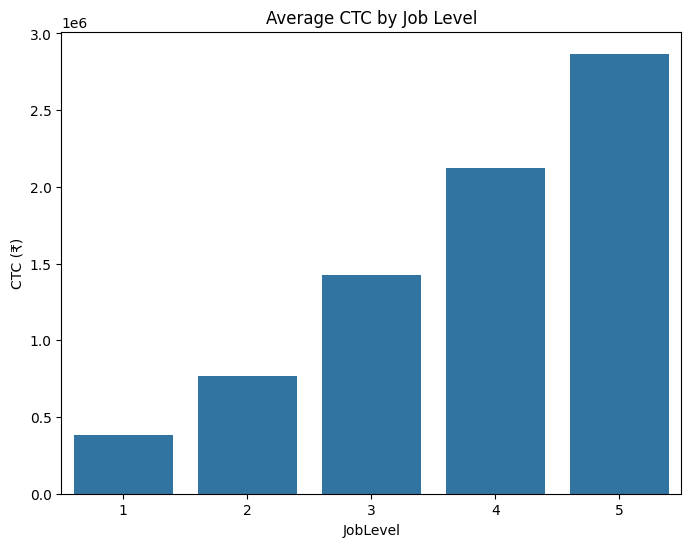

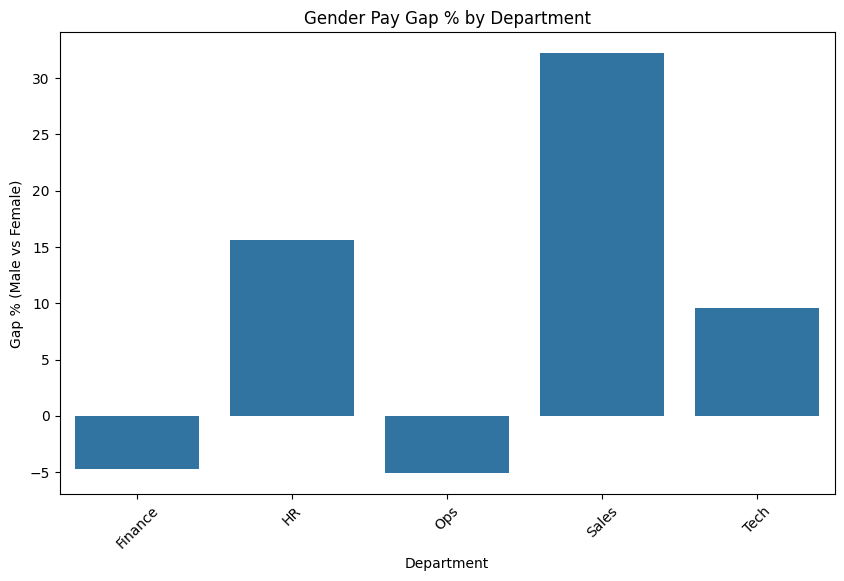

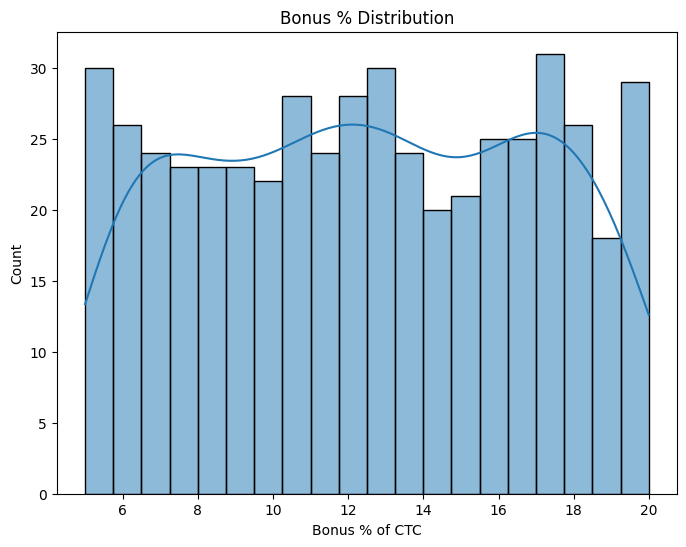

In [11]:
# Step 5: Visuals

# 1. Avg CTC by Job Level
plt.figure(figsize=(8,6))
sns.barplot(x="JobLevel", y="mean", data=avg_by_level)
plt.title("Average CTC by Job Level")
plt.ylabel("CTC (₹)")
plt.savefig("images/comp_ctc_by_joblevel.png", bbox_inches="tight")
plt.show()

# 2. Gender Pay Gap by Department
plt.figure(figsize=(10,6))
sns.barplot(x=gender_gap.index, y=gender_gap["Gap %"])
plt.title("Gender Pay Gap % by Department")
plt.ylabel("Gap % (Male vs Female)")
plt.xticks(rotation=45)
plt.savefig("images/comp_gender_gap.png", bbox_inches="tight")
plt.show()

# 3. Bonus % Distribution
plt.figure(figsize=(8,6))
sns.histplot(df["Bonus %"], bins=20, kde=True)
plt.title("Bonus % Distribution")
plt.xlabel("Bonus % of CTC")
plt.savefig("images/comp_bonus_dist.png", bbox_inches="tight")
plt.show()

In [12]:

# Step 6: Export Artifacts

# Processed dataset
df.to_csv("data/Comp_Analytics_Processed.csv", index=False)

print("✅ Artifacts generated:")
print("- data/Comp_Analytics_Processed.csv")
print("- images/comp_ctc_by_joblevel.png")
print("- images/comp_gender_gap.png")
print("- images/comp_bonus_dist.png")

✅ Artifacts generated:
- data/Comp_Analytics_Processed.csv
- images/comp_ctc_by_joblevel.png
- images/comp_gender_gap.png
- images/comp_bonus_dist.png


## ✅ Conclusions

- **Average CTC:** X Lakhs, **Median CTC:** Y Lakhs  
- **By Level:** Pay rises steadily with seniority.  
- **By Gender:** Gap of Z% in Dept A (highest disparity).  
- **Bonuses:** Top 10% employees capture ~__% of total bonus pool.  

📓 Notebook: [Compensation_Analytics_V1.ipynb](notebooks/Compensation_Analytics_V1.ipynb)